<a href="https://colab.research.google.com/github/docmhvr/Deep_Learning_with_Pytorch/blob/main/Deep_Learning_on_Auto_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning with Auto-MPG Dataset**
**Dataset :** Auto MPG [link](https://archive.ics.uci.edu/dataset/9/auto+mpg)

**Reference :** Quinlan,R.. (1993). Auto MPG. UCI Machine Learning Repository. https://doi.org/10.24432/C5859H.

"*The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.*" (Quinlan, 1993)

### Data Loading

In [1]:
!pip install ucimlrepo

In [19]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

### Data Processing

In [20]:
import pandas as pd

In [21]:
dataset= pd.concat([X, y], axis=1)

In [25]:
dataset.head()
dataset.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [26]:
dataset.isna().sum()

,0
displacement,0
cylinders,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
mpg,0


In [27]:
dataset = dataset.dropna()

In [35]:
dataset.shape
dataset.tail()
dataset.value_counts()
dataset.isna().sum()

,0
displacement,0
cylinders,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
mpg,0


In [40]:
dataset

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


### Split into Train and Test data

In [36]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset  = dataset.drop(train_dataset.index)

print(train_dataset.shape)
print(test_dataset.shape)

(314, 8)
(78, 8)


### Split Features and Target

In [38]:
X_train = train_dataset.copy()
X_test  = test_dataset.copy()

# Separate target values from features.
y_train = X_train.pop('mpg')
y_test  = X_test.pop('mpg')

In [41]:
X_train

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
79,96.0,4,69.0,2189,18.0,72,2
276,121.0,4,115.0,2795,15.7,78,2
248,91.0,4,60.0,1800,16.4,78,3
56,91.0,4,70.0,1955,20.5,71,1
393,140.0,4,86.0,2790,15.6,82,1
...,...,...,...,...,...,...,...
218,79.0,4,58.0,1825,18.6,77,2
281,200.0,6,85.0,2990,18.2,79,1
342,135.0,4,84.0,2385,12.9,81,1
238,98.0,4,83.0,2075,15.9,77,1


In [42]:
y_train

,mpg
79,26.0
276,21.6
248,36.1
56,26.0
393,27.0
...,...
218,36.0
281,19.8
342,30.0
238,33.5


### Feature Scaling
*Using Horsepower and Displacement for prediction of MPG target feature using Normalization Z scalar where we subtract the mean and divide by standard deviation*

In [43]:
import numpy as np

In [45]:
# Calculate mean and standard deviation for Horsepower
mean_hp = np.mean(X_train['horsepower'])
std_hp  = np.std(X_train['horsepower'])

# Scale Horsepower feature
X_train["horsepower_scaled"] = (X_train["horsepower"] - mean_hp) / std_hp
X_test["horsepower_scaled"]  = (X_test["horsepower"]  - mean_hp) / std_hp

# Calculate mean and standard deviation for Displacement
mean_dis = np.mean(X_train["displacement"])
std_dis  = np.std(X_train["displacement"])

# Scale Displacement feature
X_train["displacement_scaled"] = (X_train["displacement"] - mean_dis) / std_dis
X_test["displacement_scaled"]  = (X_test["displacement"] -  mean_dis) / std_dis

### Pytorch Training
<img src="https://raw.githubusercontent.com/docmhvr/Deep_Learning_with_Pytorch/main/Linear_Regression_Training_workflow.jpg" alt="Image" width="360" height="420">


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

### Uni-Variate Linear Model
Single feature *horsepower_scaled* <br>to estimate *mpg* or *Miles per Gallon* and <br>develop a Linear Regression model *linear_1d_model*

In [46]:
class Regressor(nn.Module):
    # define model elements
    def __init__(self, input_dim, output_dim):
        super(Regressor, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    # Forward pass
    def forward(self, x):
        return self.linear(x)

In [54]:
# Intialize an instance of the PyTorch model class.
linear_1d_model = Regressor(input_dim=1, output_dim=1)

batch_size = 1
summary(linear_1d_model, input_size=(batch_size,1,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [57]:
# Initialize Optimizer by passing the parameters of the model and the learning rate to use.
# The model parameters passed to the optimizer will be updated during training.
optimizer = optim.Adam(linear_1d_model.parameters(), lr=0.1)

# Intialize a Loss function.
# Here we are using L1Loss that measures the mean absolute error (MAE) between the input x and target y.
criterion = torch.nn.L1Loss()

### Model Training

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# Splitting the data to train and validation sets for efficient model training
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [61]:
# To record the traning and validation loss metrics.
loss_curve_train_linear_1d = []
loss_curve_eval_linear_1d  = []

In [63]:
X_train_hp = torch.from_numpy(X_train_split["horsepower_scaled"].values).reshape(-1, 1).to(torch.float32)
y_train_t = torch.from_numpy(y_train_split.values).reshape(-1, 1).to(torch.float32) # Train target converted to pytorch tensor.

X_val_hp = torch.from_numpy(X_val_split["horsepower_scaled"].values).reshape(-1, 1).to(torch.float32)
y_val_t    = torch.from_numpy(y_val_split.values).reshape(-1, 1).to(torch.float32) # Validation target converted to pytorch tensor.

In [64]:
# This is the training loop. We will go through the dataset 500 times.
# During each pass the model will be updated and get closer to the true target values.
for epoch in range(500):

    linear_1d_model.train() # Set model in training mode.
    # Not required here as the layers used behave the same way during training and evaluation but best practice

    output = linear_1d_model(X_train_hp) # Perform forward pass through the model.
    loss = criterion(output, y_train_t)  # Calculate L1 loss on the model predictions.
    optimizer.zero_grad()                # Reset gradients.
    loss.backward()                      # Calcualte gradients based on the loss.
    optimizer.step()                     # Update parameters.

    loss_curve_train_linear_1d.append(loss.detach().item()) # Record training loss.


    linear_1d_model.eval() # Set model in evaluation mode.

    with torch.no_grad(): # Disable gradient calculation.
        output = linear_1d_model(X_val_hp) # Perform forward pass through the validation set.

    loss = criterion(output, y_val_t) # Calculate the loss on the validation set.
    loss_curve_eval_linear_1d.append(loss.item()) # Record validation loss.

    # # Print per epoch log table.
    # # Slows down speed because we are printing and erasing the table continuously.
    # clear_output(wait=True)
    # print(f"{BOLD}{'Epoch':^10}{END}|{BOLD}{'Loss':^15}{END}|{BOLD}{'Val_loss':^10}{END}")
    # print(f"{'':=^35}")
    # print(f"{epoch+1:^10}|{loss_curve_train_linear_1d[-1]:^15.8f}|{loss_curve_eval_linear_1d[-1]:^10.3f}")

Results of Uni-Variate Model

In [66]:
import matplotlib.pyplot as plt

In [67]:
def plot_loss(loss_curve_train, loss_curve_eval):
    plt.figure(figsize=(15, 5))
    plt.plot(loss_curve_train, label="Loss")
    plt.plot(loss_curve_eval, label="Val Loss")
    plt.ylim([0, 30])
    plt.xlabel("Epoch")
    plt.ylabel("Error [MPG]")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()
    return

Plotting Loss curves for training and validation loss

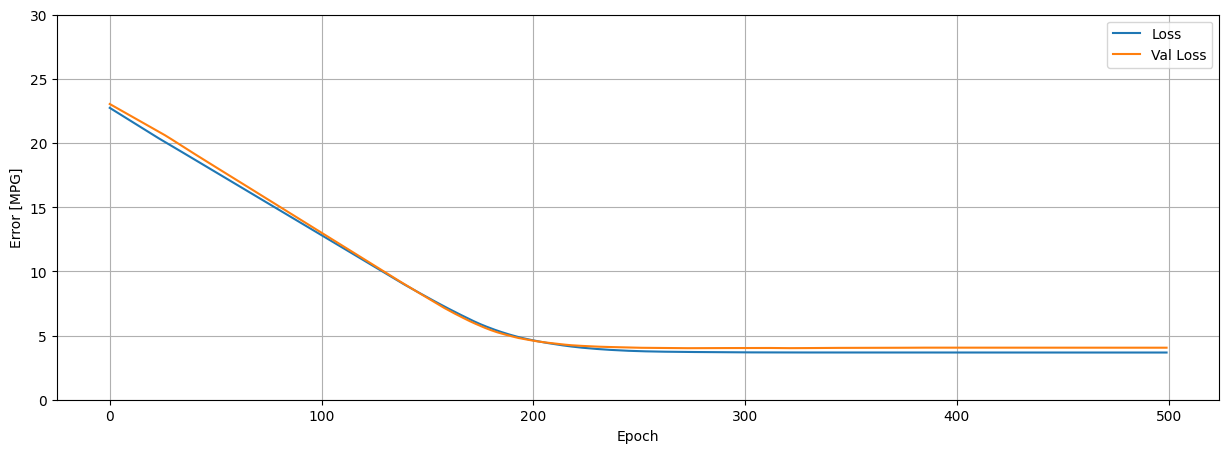

In [68]:
plot_loss(loss_curve_train_linear_1d, loss_curve_eval_linear_1d)

Comparing loss metrics for training and validation, check for model generalization

In [69]:
hist = pd.DataFrame(
    {
        "loss":     loss_curve_train_linear_1d,
        "val_loss": loss_curve_eval_linear_1d,
    }
)

hist.describe()

,loss,val_loss
count,500.000000,500.000000
mean,7.460377,7.724062
std,5.715479,5.741744
min,3.677527,4.015687
25%,3.677632,4.051886
50%,3.787203,4.056960
75%,10.375773,10.475464
max,22.743095,23.043274


### Model Prediction

In [71]:
# Generate feature data for Horsepower.
x = torch.linspace(X_train["horsepower"].min(), X_train["horsepower"].max(), len(X_train["horsepower"]))

# Use the model to predict MPG.
linear_1d_model.eval()

with torch.no_grad():
    y = linear_1d_model((x.view(-1, 1) - mean_hp) / std_hp)

In [72]:
def plot_horsepower(x, y):
    plt.figure(figsize=(15, 5))

    plt.scatter(
        (X_train["horsepower_scaled"] * std_hp) + mean_hp,
        y_train,
        label="Data",
        color="green",
        alpha=0.5,
    )
    plt.plot(x, y, color="k", label="Predictions")
    plt.xlabel("horsepower")
    plt.ylabel("mpg")
    plt.grid(True)
    plt.legend()

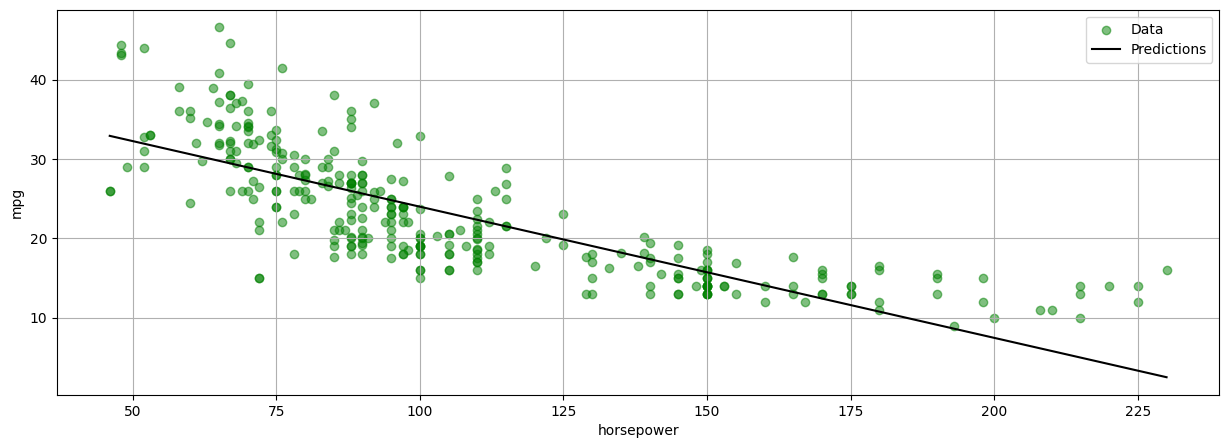

In [73]:
plot_horsepower(x.view(-1, 1).numpy(), y.numpy())

### Multi-Variate Linear Model
Two feature *horsepower_scaled* and *displacement_scaled*<br>to estimate *mpg* or *Miles per Gallon* and <br>develop a Linear Regression model *linear_2d_model*

In [79]:
linear_2d_model = Regressor(input_dim=2, output_dim=1)

batch_size = 1
summary(linear_2d_model, input_size=(batch_size, 2,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [80]:
# Initialize Optimizer and loss function.

optimizer = optim.Adam(linear_2d_model.parameters(), lr=0.1)
criterion = torch.nn.L1Loss()

Defining helper functions for training 2D model for Linear Regression

In [81]:
def train_one_epoch(model: torch.nn.Module, optimizer: torch.optim.Optimizer, loss_fn: torch.nn.Module, dataset: tuple):

    data, target = dataset
    model.train() # Set model in training mode.

    outputs = model(data)           # Perform forward pass through the model.
    loss = loss_fn(outputs, target) # Calculate L1 loss on the model predictions.
    optimizer.zero_grad()           # Reset gradients.
    loss.backward()                 # Calcualte gradients based on the loss.
    optimizer.step()                # Update parameters.

    return loss.detach().item()

def evaluate(model: torch.nn.Module, loss_fn: torch.nn.Module, dataset: tuple):

    data, target = dataset

    model.eval() # Set model in evaluation mode.

    with torch.no_grad():
        outputs = model(data) # Perform forward pass through the validation set.

    loss = loss_fn(outputs, target) # Calculate the loss on the validation set.

    return loss.item()

@torch.inference_mode()
def generate_predictions(model, data):
    model.eval()

    outputs = model(data)

    return outputs

In [83]:
# Initialize the 2-feature dataset. The targets remain the same.

X_train_hp_dp = torch.from_numpy(X_train_split[['horsepower_scaled','displacement_scaled']].values).reshape(-1, 2).to(torch.float32)
X_val_hp_dp   = torch.from_numpy(X_val_split[['horsepower_scaled', 'displacement_scaled']].values).reshape(-1, 2).to(torch.float32)

In [84]:
from tqdm import trange

# To record the traning and validation loss metrics.
loss_curve_train_linear_2d = []
loss_curve_eval_linear_2d  = []

for epoch in trange(500):

    # Perform one epoch of training and then evaluate on the validation set.
    train_loss = train_one_epoch(linear_2d_model, optimizer, criterion, (X_train_hp_dp, y_train_t))
    val_loss   = evaluate(linear_2d_model, criterion, (X_val_hp_dp, y_val_t))

    # Record training and validation loss
    loss_curve_train_linear_2d.append(train_loss)
    loss_curve_eval_linear_2d.append(val_loss)

100%|██████████| 500/500 [00:00<00:00, 706.89it/s]


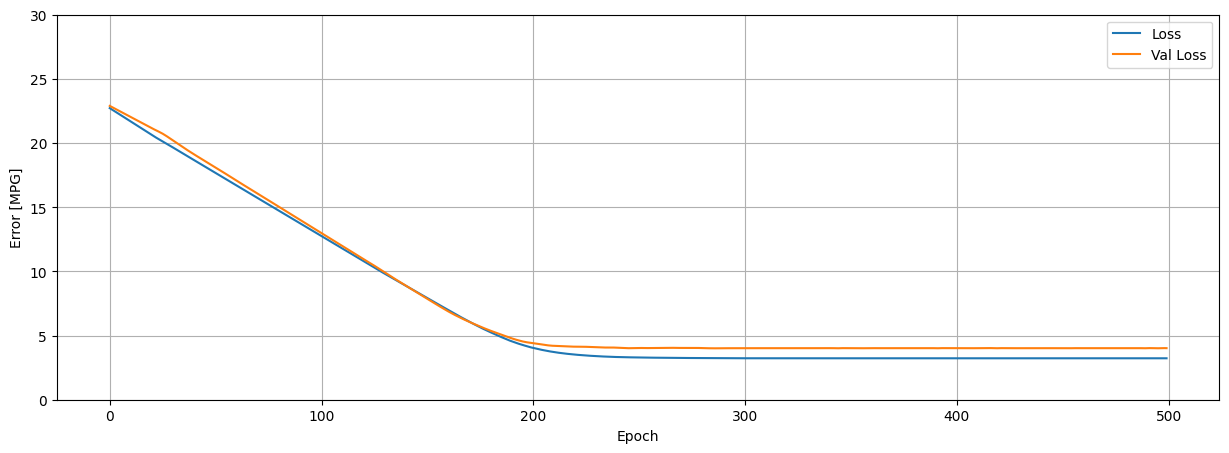

In [85]:
plot_loss(loss_curve_train_linear_2d, loss_curve_eval_linear_2d)

Visualizing the 2D model in a 2D space

In [87]:
hp_min = (X_train.horsepower_scaled.min()   * std_hp)  + mean_hp
hp_max = (X_train.horsepower_scaled.max()   * std_hp)  + mean_hp
dp_min = (X_train.displacement_scaled.min() * std_dis) + mean_dis
dp_max = (X_train.displacement_scaled.max() * std_dis) + mean_dis

x_surf, y_surf = np.meshgrid(np.linspace(hp_min, hp_max, 100), np.linspace(dp_min, dp_max, 100))

x_grid = pd.DataFrame(
    {
        'Horsepower':   (x_surf.ravel() - mean_hp) / std_hp,
        'Displacement': (y_surf.ravel() -mean_dis) / std_dis,
     }
)

pred_y = generate_predictions(linear_2d_model, data=torch.from_numpy(x_grid.values).view(-1,2).float()).numpy()

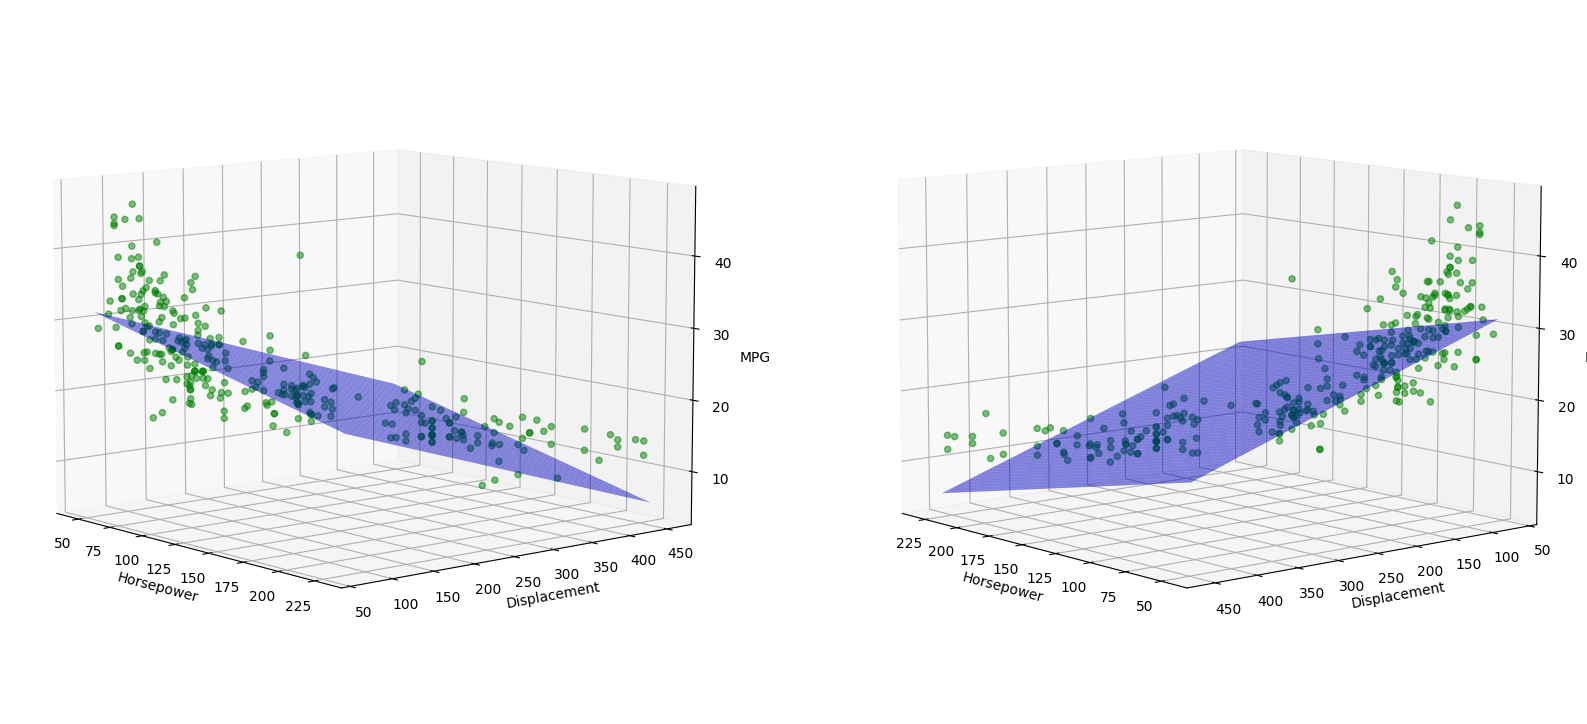

In [89]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter((X_train['horsepower_scaled'] * std_hp) + mean_hp, (X_train['displacement_scaled'] * std_dis) + mean_dis, y_train, c='green', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, pred_y.reshape(x_surf.shape), color='blue', alpha=0.5)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Displacement')
ax.set_zlabel('MPG')
ax.view_init(9, -40)

ax = fig.add_subplot(122, projection='3d')
ax.scatter((X_train['horsepower_scaled'] * std_hp) + mean_hp, (X_train['displacement_scaled'] * std_dis) + mean_dis, y_train, c='green', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, pred_y.reshape(x_surf.shape), color='blue', alpha=0.5)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Displacement')
ax.set_zlabel('MPG')
ax.view_init(9, 140)

### **DEEP LEARNING**

### Deep Learning with Single Feature
Single feature *horsepower_scaled* <br>to estimate *mpg* or *Miles per Gallon* and <br>develop a Deep Regression model *dnn_1d_model*

In [90]:
import torch.nn.functional as F

In [92]:
class Regressor_2(nn.Module):

    # Initialize the parameter
    def __init__(self, in_features=2, out_features=1, intermediate=10):
        super().__init__()

        self.linear_1 = nn.Linear(in_features=in_features,  out_features=intermediate) # Input Layer
        self.linear_2 = nn.Linear(in_features=intermediate, out_features=intermediate) # Hidden Layer
        self.linear_3 = nn.Linear(in_features=intermediate, out_features=out_features) # Output Layer

    # Forward pass
    def forward(self, x):
        # First Linear layer --=> ReLU activation
        pred = F.relu(self.linear_1(x))

        # Second Linear layer --=> ReLU activation
        pred = F.relu(self.linear_2(pred))

        # Third Linear layer.
        pred = self.linear_3(pred)
        return pred

In [94]:
dnn_1d_model = Regressor_2(in_features=1, out_features=1, intermediate=32)

batch_size = 1
summary(dnn_1d_model, input_size=(batch_size, 1,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 32]              64
            Linear-2                [-1, 1, 32]           1,056
            Linear-3                 [-1, 1, 1]              33
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [95]:
# Initialize Optimizer and loss function.

optimizer = optim.Adam(dnn_1d_model.parameters(), lr=0.01)
criterion = torch.nn.L1Loss()

In [96]:
# To record the traning and validation loss metrics.
loss_curve_train_dnn_1d = []
loss_curve_eval_dnn_1d  = []

for epoch in trange(500):

    # Perform one epoch of training and then evaluate on the validation set.
    train_loss = train_one_epoch(dnn_1d_model, optimizer, criterion, (X_train_hp, y_train_t))
    val_loss   = evaluate(dnn_1d_model, criterion, (X_val_hp, y_val_t))

    # Record training and validation loss
    loss_curve_train_dnn_1d.append(train_loss)
    loss_curve_eval_dnn_1d.append(val_loss)

100%|██████████| 500/500 [00:01<00:00, 344.86it/s]


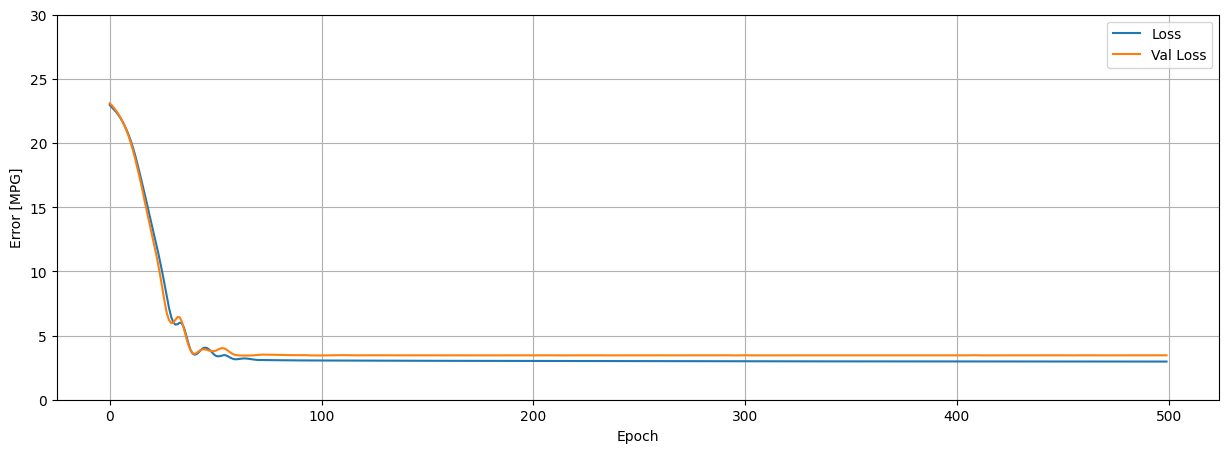

In [97]:
plot_loss(loss_curve_train_dnn_1d, loss_curve_eval_dnn_1d)

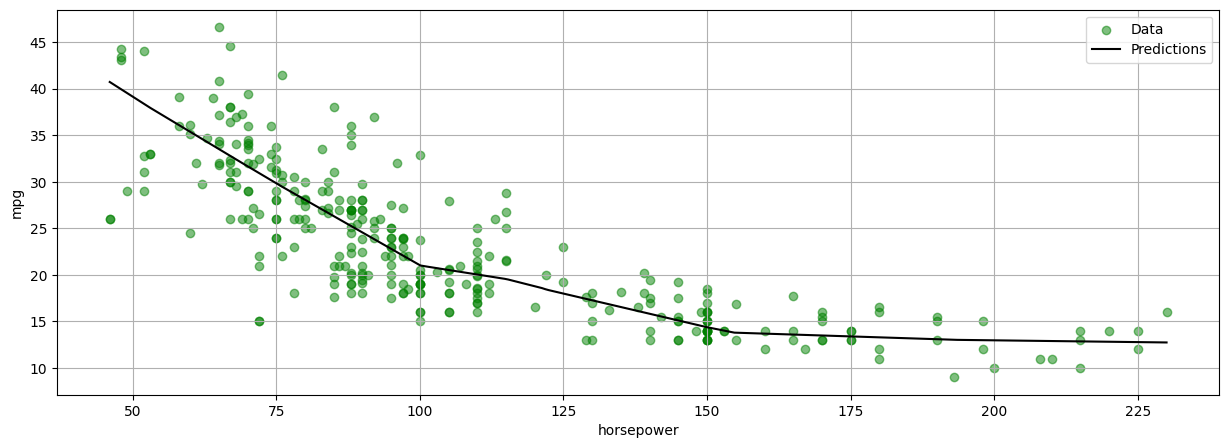

In [99]:
x = torch.linspace(X_train["horsepower"].min(), X_train["horsepower"].max(), len(X_train["horsepower"]))

y = generate_predictions(dnn_1d_model, data=((x.view(-1, 1) - mean_hp) / std_hp)).numpy()

plot_horsepower(x, y)

### Deep Learning with Multiple Features
Two features *horsepower_scaled* and *displacement_scaled*<br>to estimate *mpg* or *Miles per Gallon* and <br>develop a Deep Regression 2D model *dnn_2d_model*

In [100]:
dnn_2d_model = Regressor_2(in_features=2, out_features=1, intermediate=32)

batch_size = 1

summary(dnn_2d_model, input_size=(batch_size, 2,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 32]              96
            Linear-2                [-1, 1, 32]           1,056
            Linear-3                 [-1, 1, 1]              33
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [101]:
# Initialize Optimizer and loss function.

optimizer = optim.Adam(dnn_2d_model.parameters(), lr=0.01)
criterion = torch.nn.L1Loss()

In [102]:
from tqdm import trange

# To record the traning and validation loss metrics.
loss_curve_train_dnn_2d = []
loss_curve_eval_dnn_2d  = []

for epoch in trange(500):

    # Perform one epoch of training and then evaluate on the validation set.
    train_loss = train_one_epoch(dnn_2d_model, optimizer, criterion, (X_train_hp_dp, y_train_t))
    val_loss   = evaluate(dnn_2d_model, criterion, (X_val_hp_dp, y_val_t))

    # Record training and validation loss
    loss_curve_train_dnn_2d.append(train_loss)
    loss_curve_eval_dnn_2d.append(val_loss)

100%|██████████| 500/500 [00:01<00:00, 376.12it/s]


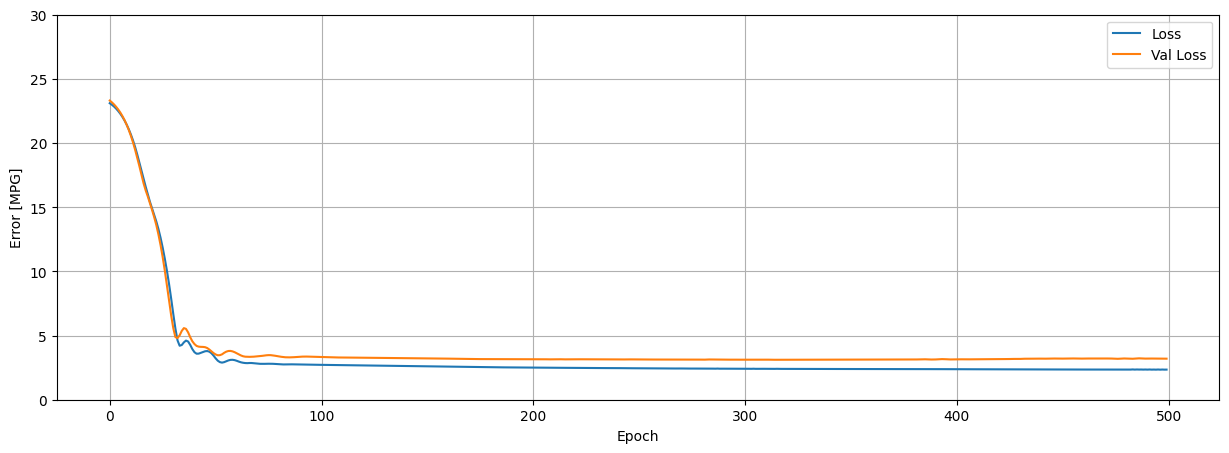

In [103]:
plot_loss(loss_curve_train_dnn_2d, loss_curve_eval_dnn_2d)

Visualizing the Deep Neural Network Model in 3D space

In [104]:
hp_min = (X_train.horsepower_scaled.min()   * std_hp)  + mean_hp
hp_max = (X_train.horsepower_scaled.max()   * std_hp)  + mean_hp
dp_min = (X_train.displacement_scaled.min() * std_dis) + mean_dis
dp_max = (X_train.displacement_scaled.max() * std_dis) + mean_dis

x_surf, y_surf = np.meshgrid(np.linspace(hp_min, hp_max, 100), np.linspace(dp_min, dp_max, 100))

x_grid = pd.DataFrame(
    {
        'Horsepower':   (x_surf.ravel() - mean_hp)  / std_hp,
        'Displacement': (y_surf.ravel() - mean_dis) / std_dis,
     }
)

pred_y = generate_predictions(dnn_2d_model, data=torch.from_numpy(x_grid.values).view(-1,2).float()).numpy()

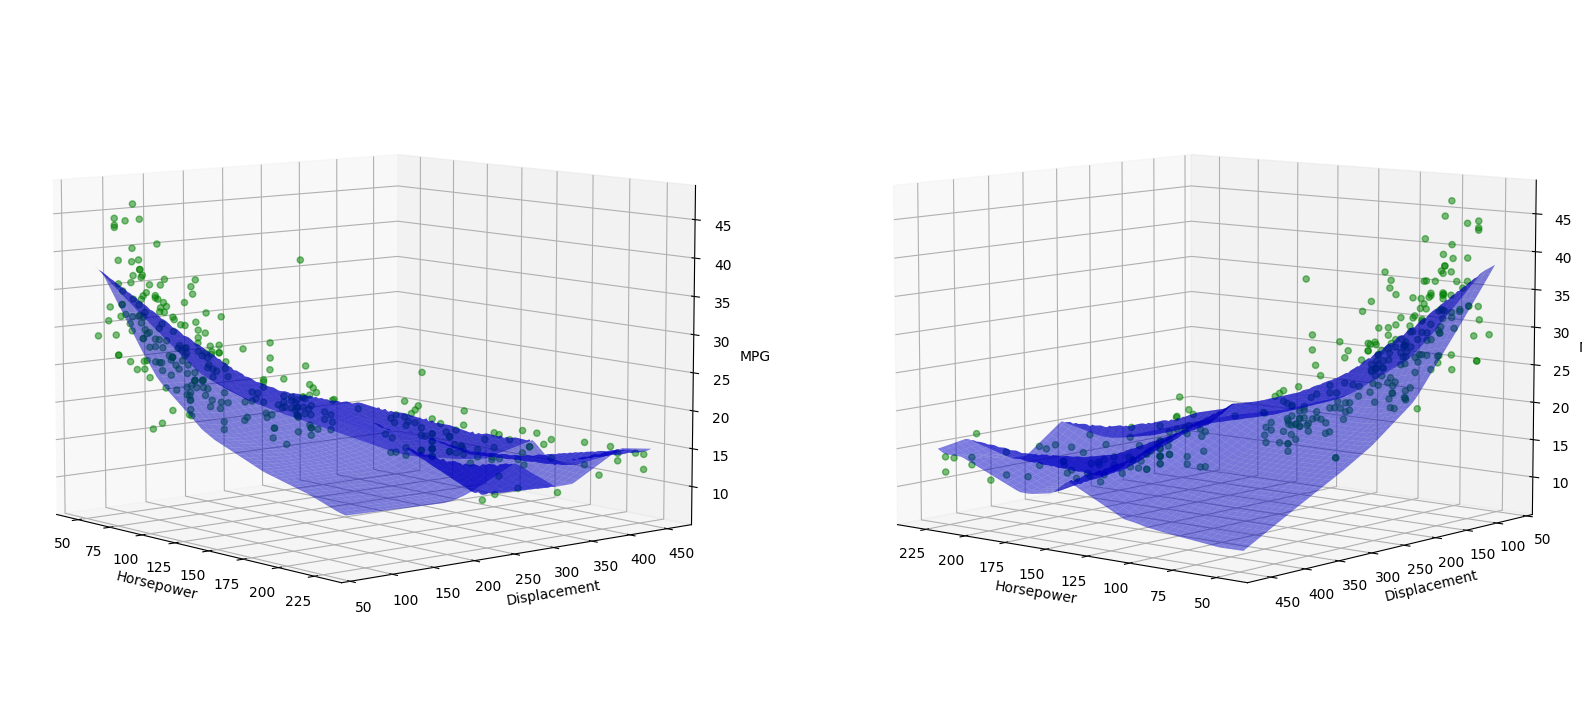

In [105]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(
    (X_train['horsepower_scaled'] * std_hp) + mean_hp, (X_train['displacement_scaled'] * std_dis) + mean_dis,
    y_train,
    c='green',
    marker='o',
    alpha=0.5
)
ax.plot_surface(x_surf, y_surf, pred_y.reshape(x_surf.shape), color='blue', alpha=0.5)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Displacement')
ax.set_zlabel('MPG')
ax.view_init(8, -40)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(
    (X_train['horsepower_scaled'] * std_hp) + mean_hp, (X_train['displacement_scaled'] * std_dis) + mean_dis,
    y_train,
    c='green',
    marker='o',
    alpha=0.5
)
ax.plot_surface(x_surf, y_surf, pred_y.reshape(x_surf.shape), color='blue', alpha=0.5)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Displacement')
ax.set_zlabel('MPG')
ax.view_init(8, 130)

### Model Testing and Model Comparison

Comparing Training Losses of all 4 Models

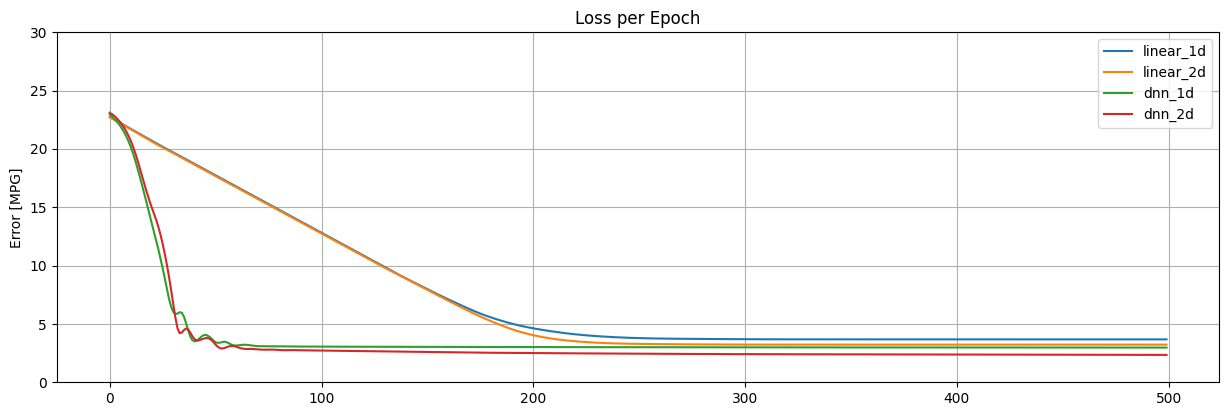

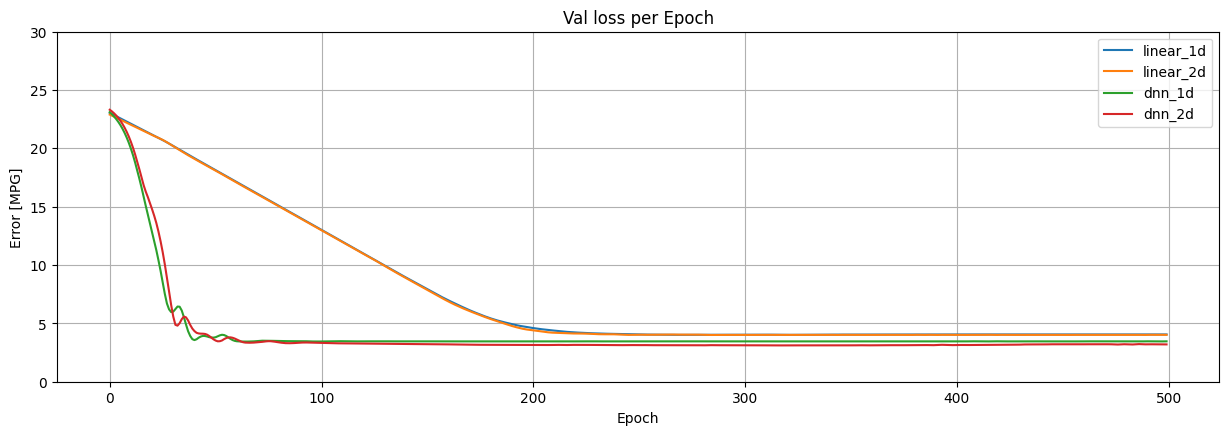

In [106]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(loss_curve_train_linear_1d, label="linear_1d")
plt.plot(loss_curve_train_linear_2d, label="linear_2d")
plt.plot(loss_curve_train_dnn_1d,    label="dnn_1d")
plt.plot(loss_curve_train_dnn_2d,    label="dnn_2d")
plt.ylim([0, 30])
plt.ylabel("Error [MPG]")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 2)
plt.plot(loss_curve_eval_linear_1d, label="linear_1d")
plt.plot(loss_curve_eval_linear_2d, label="linear_2d")
plt.plot(loss_curve_eval_dnn_1d,    label="dnn_1d")
plt.plot(loss_curve_eval_dnn_2d,    label="dnn_2d")
plt.ylim([0, 30])
plt.xlabel("Epoch")
plt.ylabel("Error [MPG]")
plt.title("Val loss per Epoch")
plt.legend()
plt.grid(True)

plt.show()
plt.close()

Model Evaluation Comparison on Test dataset

In [107]:
# Prepare test set.
X_test_hp    = torch.from_numpy(X_test["horsepower_scaled"].values).reshape(-1, 1).to(torch.float32)
X_test_hp_dp = torch.from_numpy(X_test[["horsepower_scaled", "displacement_scaled"]].values).reshape(-1, 2).to(torch.float32)

y_test = torch.from_numpy(y_test.values).reshape(-1, 1).to(torch.float32)

In [108]:
# Create a dictionary to store test results.
test_results = {}

# Linear regression test results.
with torch.no_grad():
    test_results['linear_1d_model'] = criterion(linear_1d_model(X_test_hp),    y_test).numpy()
    test_results['linear_2d_model'] = criterion(linear_2d_model(X_test_hp_dp), y_test).numpy()

    # Deep learning regression test results.
    test_results['dnn_1d_model'] = criterion(dnn_1d_model(X_test_hp),   y_test).numpy()
    test_results['dnn_2d_model'] = criterion(dnn_2d_model(X_test_hp_dp), y_test).numpy()

In [109]:
pd.DataFrame(test_results, index=['Mean Absolute Error [MPG]']).T

,Mean Absolute Error [MPG]
linear_1d_model,3.873703
linear_2d_model,3.361326
dnn_1d_model,3.415648
dnn_2d_model,2.793511


Visualization of Model's Predictions

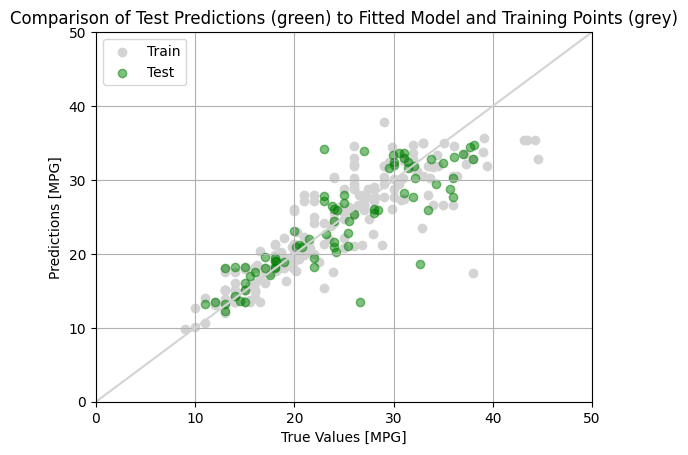

In [110]:
with torch.no_grad():
    train_predictions = dnn_2d_model(X_train_hp_dp).squeeze()
    test_predictions =  dnn_2d_model(X_test_hp_dp).squeeze()

plt.scatter(y_train_t.numpy(), train_predictions.numpy(), c='lightgray')
plt.scatter(y_test.numpy(),  test_predictions.numpy(),    c='green', alpha=.5)
plt.title('Comparison of Test Predictions (green) to Fitted Model and Training Points (grey)')
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.legend(['Train', 'Test'])
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.grid('on')
plt.plot(lims, lims, c='lightgray');

Test Error Distribution

In [112]:
test_error = (test_predictions - y_test.squeeze())
mae = torch.mean(torch.abs(test_error))

print('MAE for dnn_2d_model: ', int(mae * 10000) / 10000)

MAE for dnn_2d_model:  2.7935


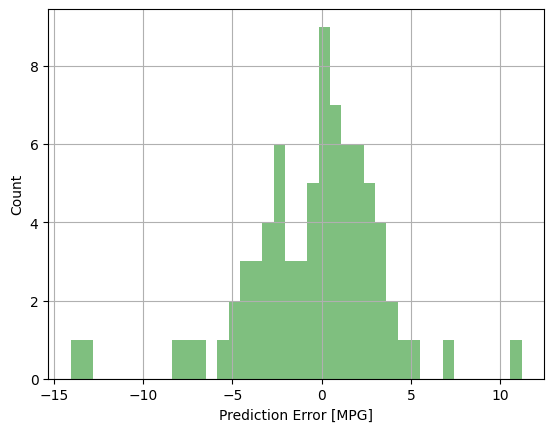

In [113]:
plt.hist(test_error, bins=40, color='green', alpha=.5)
plt.xlabel('Prediction Error [MPG]')
plt.grid('on')
plt.ylabel('Count');